In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [39]:
# Read the CSV file into a Pandas dataframe
df = pd.read_csv("../data/startup_funding.csv")

# Convert 'Amount in USD' to float data type, replacing 'undisclosed' values with NaN
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'].str.replace(',', ''), errors='coerce')

# Display the first few rows of the dataframe to check if it loaded correctly
print(df.head(5))

   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growt

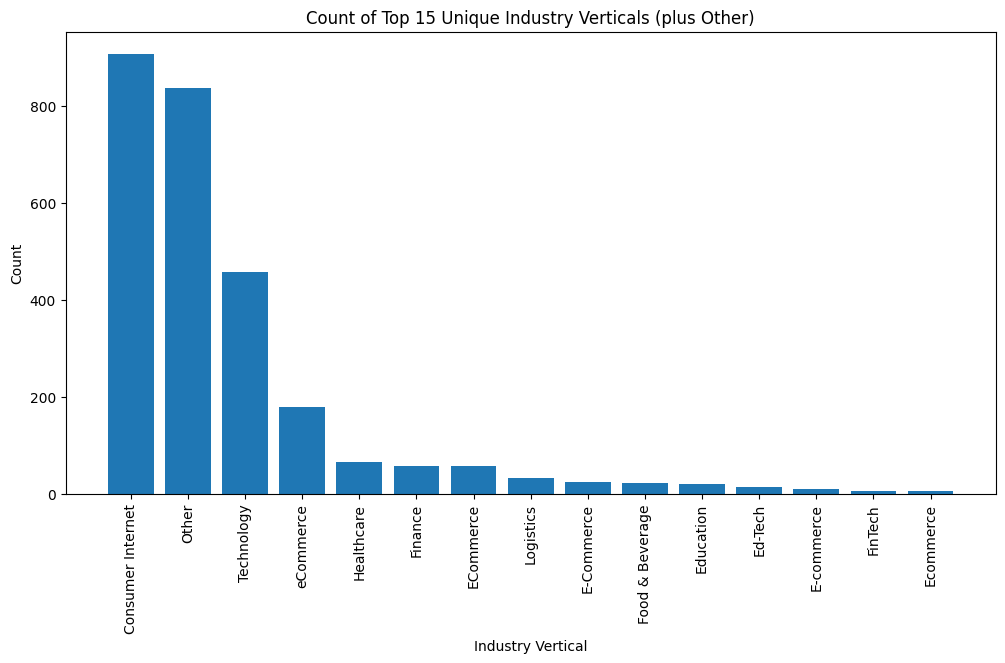

In [51]:
# Filter the 'Industry Vertical' column to include only the top 15 industries plus 'Other'
top_industries = list(industry_counts.index[:15])
df.loc[~df['Industry Vertical'].isin(top_industries), 'Industry Vertical'] = 'Other'

# Bar chart of top 15 Industry Verticals
plt.figure(figsize=(12,6))
industry_counts = df["Industry Vertical"].value_counts()
plt.bar(industry_counts.index, industry_counts.values)
plt.xticks(rotation=90)
plt.title("Count of Top 15 Unique Industry Verticals (plus Other)")
plt.xlabel("Industry Vertical")
plt.ylabel("Count")
plt.show()

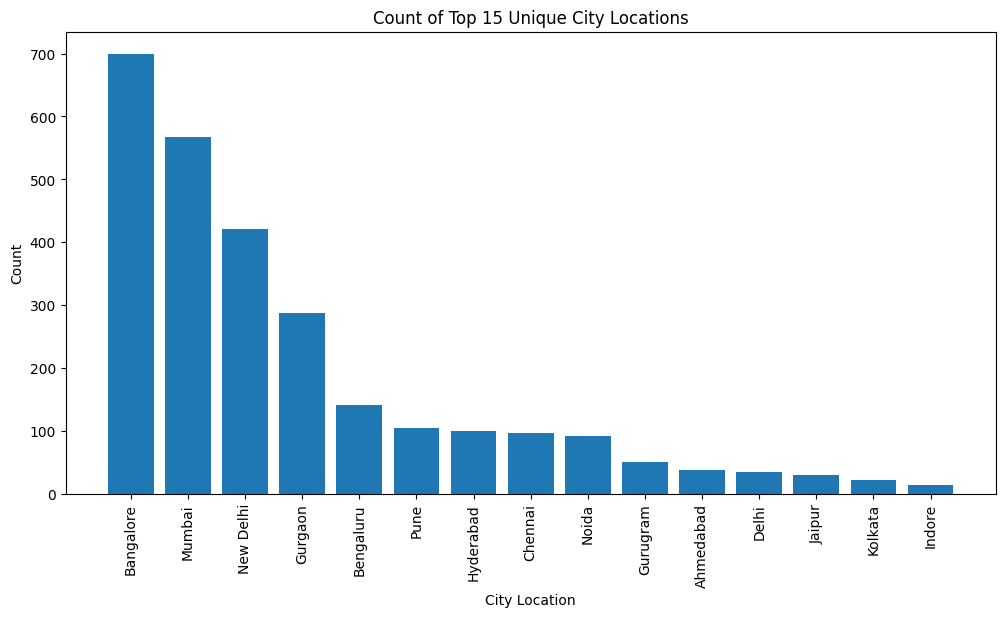

In [46]:
# Filter the 'City Location' column to include only the top 15 cities
top_cities = city_counts.index[:15]
df = df[df['City  Location'].isin(top_cities)]

# Bar chart of top 15 City Locations
plt.figure(figsize=(12,6))
city_counts = df["City  Location"].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=90)
plt.title("Count of Top 15 Unique City Locations")
plt.xlabel("City Location")
plt.ylabel("Count")
plt.show()

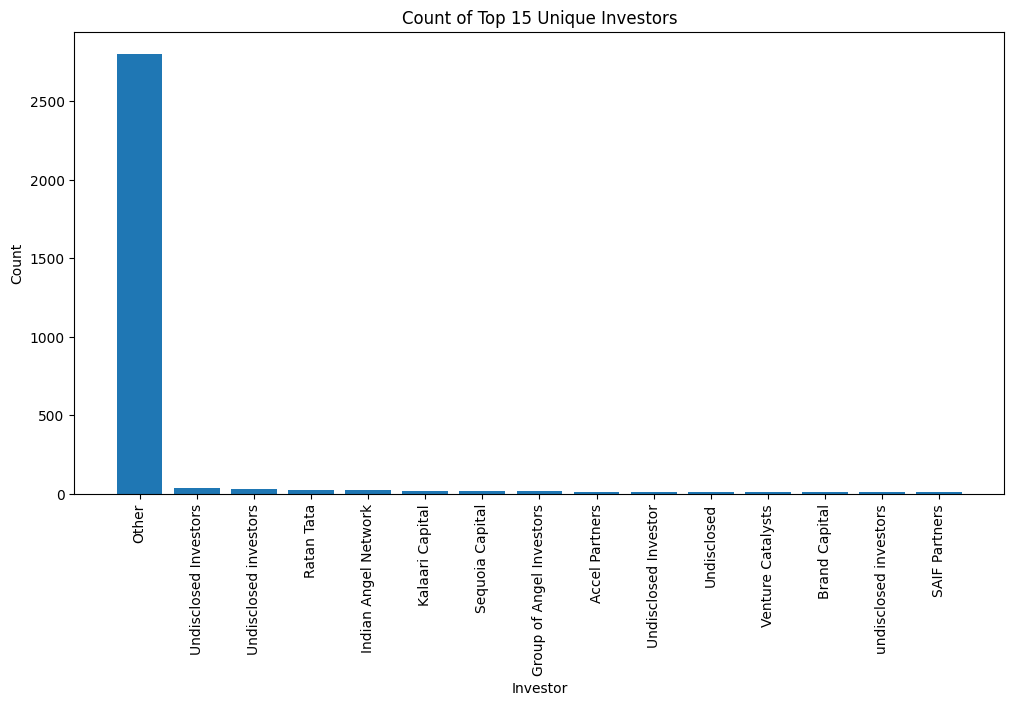

In [45]:
# 4. List and count of top 15 unique "Investors Name"
investor_counts = df["Investors Name"].value_counts()
top_investors = investor_counts[:15]
df['Investors Name'] = df['Investors Name'].apply(lambda x: x if x in top_investors else 'Other')

# Bar chart of Investors
plt.figure(figsize=(12,6))
investor_counts = df["Investors Name"].value_counts()
plt.bar(investor_counts.index, investor_counts.values)
plt.xticks(rotation=90)
plt.title("Count of Top 15 Unique Investors")
plt.xlabel("Investor")
plt.ylabel("Count")
plt.show()

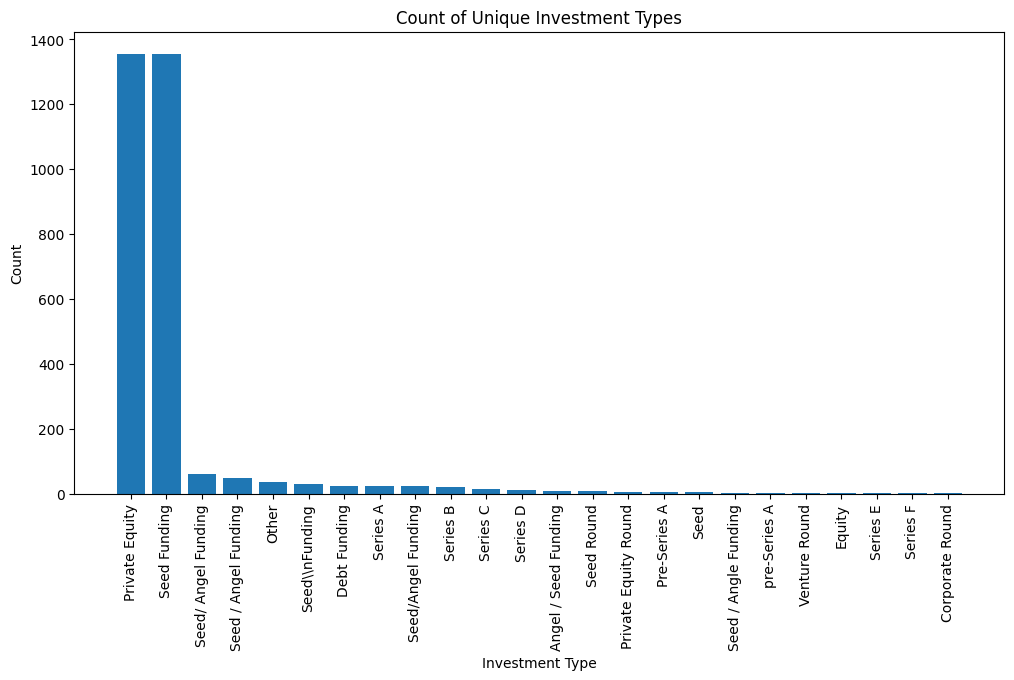

In [44]:
# 5. List and count of all unique "Investment Type"
investment_counts = df["InvestmentnType"].value_counts()
investment_counts = investment_counts[investment_counts > 1]

# Replace all city counts not in the filtered list with 'Other'
df.loc[~df['InvestmentnType'].isin(investment_counts.index), 'InvestmentnType'] = 'Other'

# Bar chart of Investment Types
plt.figure(figsize=(12,6))
plt.bar(investment_counts.index, investment_counts.values)
plt.xticks(rotation=90)
plt.title("Count of Unique Investment Types")
plt.xlabel("Investment Type")
plt.ylabel("Count")
plt.show()

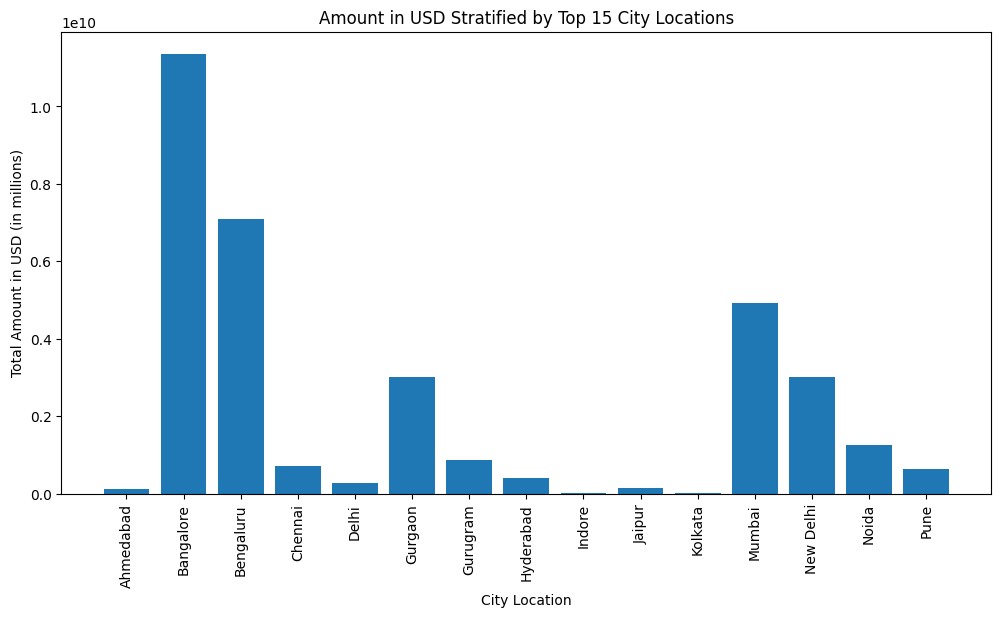

In [49]:
# Stratify 'Amount in USD' based on 'City Location'
city_strat = df.groupby('City  Location')['Amount in USD'].sum()

# Bar chart of 'Amount in USD' stratified by 'City Location'
plt.figure(figsize=(12,6))
plt.bar(city_strat.index, city_strat.values)
plt.xticks(rotation=90)
plt.title("Amount in USD Stratified by Top 15 City Locations")
plt.xlabel("City Location")
plt.ylabel("Total Amount in USD (in millions)")
plt.show()

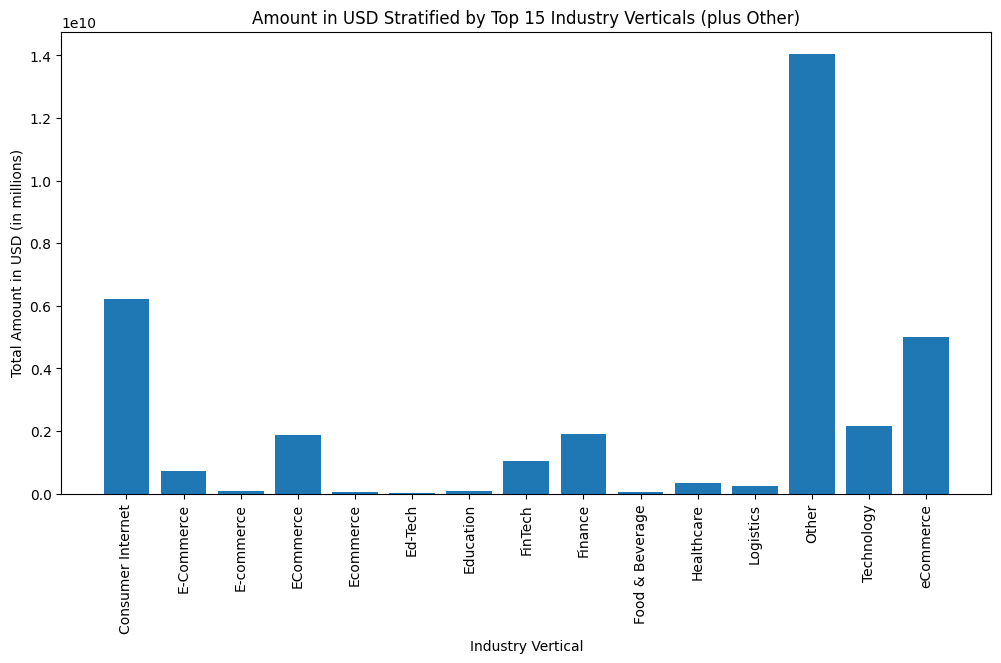

In [53]:
# Stratify 'Amount in USD' based on 'Industry Vertical'
industry_strat = df.groupby('Industry Vertical')['Amount in USD'].sum()

# Bar chart of 'Amount in USD' stratified by 'Industry Vertical'
plt.figure(figsize=(12,6))
plt.bar(industry_strat.index, industry_strat.values)
plt.xticks(rotation=90)
plt.title("Amount in USD Stratified by Top 15 Industry Verticals (plus Other)")
plt.xlabel("Industry Vertical")
plt.ylabel("Total Amount in USD (in millions)")
plt.show()

# Time Analysis

In [123]:
df = pd.read_csv("../data/startup_funding.csv")


df.rename(mapper={
        'Date dd/mm/yyyy':'Startup_date',
        'City  Location':'City',
        'Amount in USD':'Amount',
        'Startup Name':'Startupname',
        'Industry Vertical':'Industrytype',
        'Investors Name':'Investorsname'
        },axis=1, inplace=True)

df.drop(['Remarks','Sr No'],axis=1,inplace=True)

def clean_amount(amt):
    amt = str(amt)
    if ',' in amt:
        amt = amt.replace(',','')
    if amt.isnumeric():
        return float(amt)
    if amt.isalpha() or amt.startswith('\\'):
        return np.nan
    if '.' in amt:
        return float(amt)
    if '+' in amt:
        return float(amt.replace('+',''))

df['Amount'] = df['Amount'].apply(clean_amount)

x=df['Amount'].mean()
df['Amount'].fillna(x,inplace=True)

df.dropna(subset=['InvestmentnType','Investorsname'],inplace=True)

df['SubVertical'].replace(np.nan, df['SubVertical'].value_counts().idxmax(), inplace=True)

df['Industrytype'].replace(np.NaN,df['Industrytype'].value_counts().idxmax(),inplace=True)

df['City'].replace(np.NaN,df['City'].value_counts().idxmax(),inplace= True)

df.isnull().sum()

df_cat = df.select_dtypes(np.object_)
df_cat

,Startup_date,Startupname,Industrytype,SubVertical,City,Investorsname,InvestmentnType
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round
...,...,...,...,...,...,...,...
3039,29/01/2015,Printvenue,Consumer Internet,Online Lending Platform,Bangalore,Asia Pacific Internet Group,Private Equity
3040,29/01/2015,Graphene,Consumer Internet,Online Lending Platform,Bangalore,KARSEMVEN Fund,Private Equity
3041,30/01/2015,Mad Street Den,Consumer Internet,Online Lending Platform,Bangalore,"Exfinity Fund, GrowX Ventures.",Private Equity
3042,30/01/2015,Simplotel,Consumer Internet,Online Lending Platform,Bangalore,MakeMyTrip,Private Equity


In [124]:
print("Number of Unique Startups")
print(df['Startupname'].nunique())

print("")

print("Description of Funding Amounts")
print(df['Amount'].describe())

Number of Unique Startups
2437

Description of Funding Amounts
count    3.016000e+03
mean     1.829268e+07
std      9.979839e+07
min      1.600000e+04
25%      1.000000e+06
50%      7.500000e+06
75%      1.842792e+07
max      3.900000e+09
Name: Amount, dtype: float64


In [125]:
# Define a function to fix the date string by adding missing characters
def fix_date_string(date_string):
    if not isinstance(date_string, str):
        return pd.NaT
    try:
        date = datetime.strptime(date_string, '%d/%m/%Y')
    except ValueError:
        if len(date_string) == 8:
            date = datetime.strptime(date_string, '%d%m%Y')
        else:
            date = pd.NaT
    if date is not None and date is not pd.NaT:
        return date.strftime('%Y/%m/%d')
    else:
        return pd.NaT

# Apply the function to the date column
df['Startup_date'] = df['Startup_date'].apply(fix_date_string)

# Convert 'Startup_date' column to datetime data type
df['Startup_date'] = pd.to_datetime(df['Startup_date'], format='%Y-%m-%d', errors='coerce')

# Extract the year and month from the 'Startup_date' column and create a new column 'YearMonth'
df['YearMonth'] = df['Startup_date'].dt.to_period('M')

# Group the dataframe by 'YearMonth' and sum the 'Amount' invested in each month-year combination
dg_amount = df.groupby('YearMonth')['Amount'].sum().reset_index()

# Create a line chart of total investment amounts by month-year combination
fig = px.line(dg_amount, x='YearMonth', y='Amount', title='Total Investment Amounts by Month-Year Combination')
fig.show()

TypeError: Object of type Period is not JSON serializable